# Importing

In [14]:
import os
import keras 
import numpy as np
import tensorflow as tf

# Data
from keras.preprocessing.image import ImageDataGenerator as IDG

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-Trained Models
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2, ResNet50V2, ResNet50

# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, Layer, ReLU, Add, InputLayer, Multiply

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model viz
from tensorflow.keras.utils import plot_model

# Data Generation

In [15]:
# Initialize DataGenerator
train_gen = IDG(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# Load Data
train_ds = train_gen.flow_from_directory("dataset", target_size=(256,256), class_mode="binary", subset='training', shuffle=True, batch_size=32)
valid_ds = train_gen.flow_from_directory("dataset", target_size=(256,256), class_mode="binary", subset='validation', shuffle=True, batch_size=32)

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


# Data Distribution

In [16]:
class_names = sorted([f for f in os.listdir("dataset") if not f.startswith('.')])
class_count = [len(os.listdir("dataset" + "/" + name)) for name in class_names]
class_count

[698, 851, 475, 639, 591, 377, 526, 232, 1160, 692, 621]

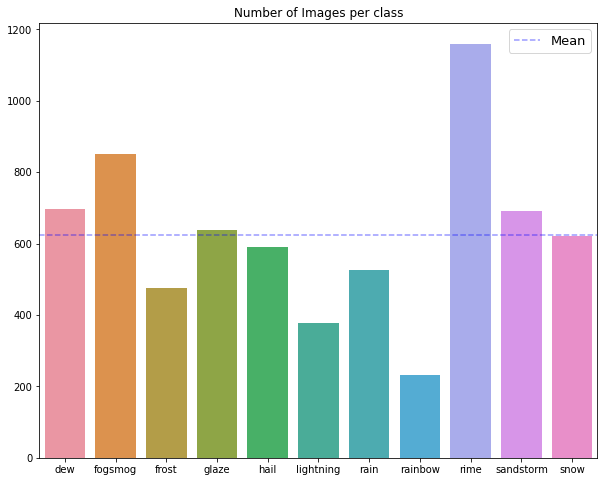

In [17]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(
    x=class_names, 
    y=class_count
)
plt.axhline(np.mean(class_count), alpha=0.4, linestyle='--', color='b', label="Mean")
plt.title("Number of Images per class")
plt.legend(fontsize=13)
plt.show()

In [18]:
# Data Visulization

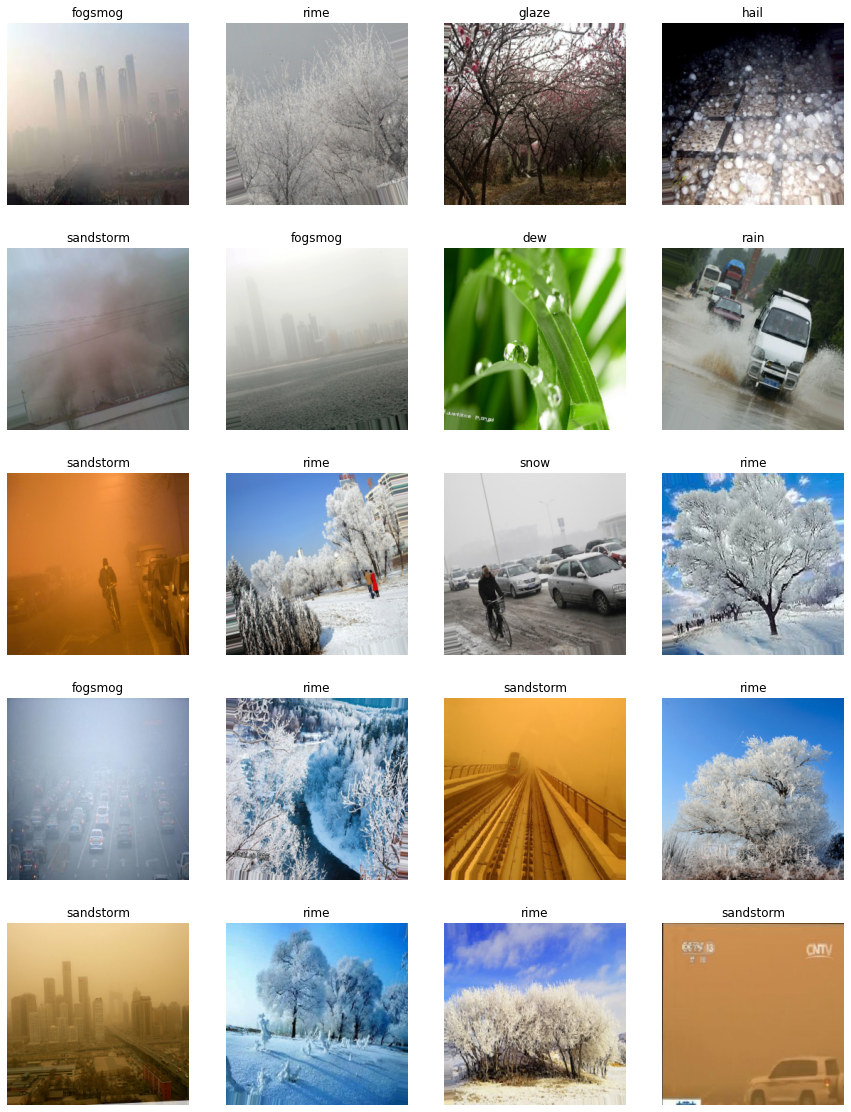

In [19]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_ds:
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])

    plt.subplot(5, 4, i)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis('off')

    i+=1
    if i>=21: break

plt.show()

# Model prediction examples


model = load_model('resnet.h5')


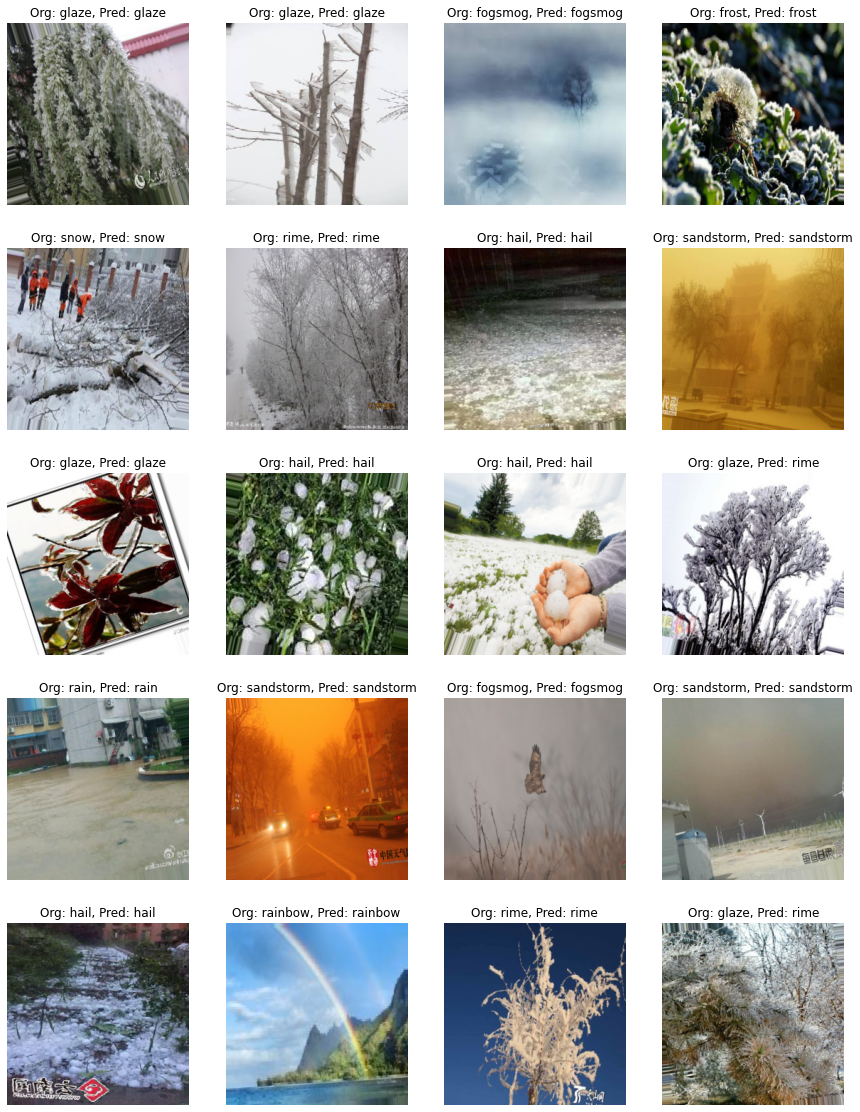

In [20]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_ds:
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])
    pred_label = class_names[np.argmax(model.predict(image[np.newaxis,...]))]

    plt.subplot(5, 4, i)
    plt.imshow(image)
    plt.title(f"Org: {class_names[label]}, Pred: {pred_label}", )
    plt.axis('off')

    i+=1
    if i>=21: break

plt.show()

# out of Distribution Data

### this is random data from campus or the internet to test quality on different data

In [21]:
train_gen = IDG(rescale=1./255)
train_ds = train_gen.flow_from_directory("untitled", target_size=(256,256), class_mode="binary", shuffle=True, batch_size=32)


Found 12 images belonging to 11 classes.


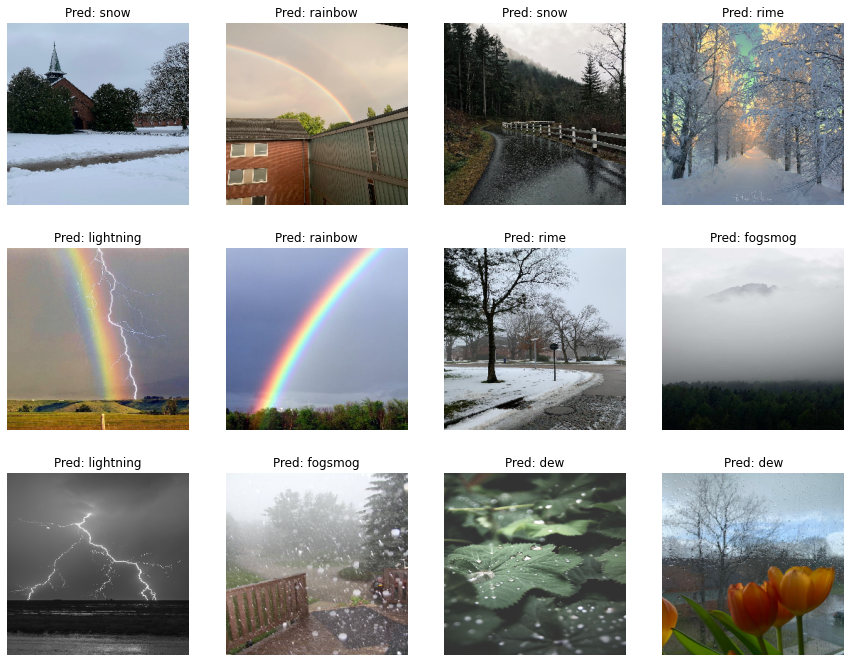

In [22]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_ds:
    while i <= len(images):
        id = i-1
        image, label = images[id], int(labels[id])
        pred_label = class_names[np.argmax(model.predict(image[np.newaxis,...]))]

        plt.subplot(5, 4, i)
        plt.imshow(image)
        plt.title(f"Pred: {pred_label}")
        plt.axis('off')

        i+=1
    break

plt.show()